# 常规赛：PALM眼底彩照中黄斑中央凹定位

## 比赛介绍

	本赛题原型为ISBI2019PALM眼科大赛。 
	近视已成为全球公共卫生负担。在近视患者中，约35%为高度近视。近视导致眼轴长度的延长，可能引起视网膜和脉络膜的病理改变。随着近视屈光度的增加，高度近视将发展为病理性近视，其特点是病理改变的形成:
	  (1)后极，包括镶嵌型眼底、后葡萄肿、视网膜脉络膜变性等;
	  (2)视盘，包括乳头旁萎缩、倾斜等;
	  (3)近视性黄斑，包括漆裂、福氏斑、CNV等。
	病理性近视对患者造成不可逆的视力损害。因此，早期诊断和定期随访非常重要。

	中央凹是视网膜中辨色力、分辨力最敏锐的区域。以人为例，在视盘颞侧约3.5mm处，有一黄色小区，称黄斑，其中央的凹陷，就是中央凹。中央凹的准确定位可辅助医生完成糖尿病视网膜、黄斑变性等病变的诊断。

![](https://ai.bdstatic.com/file/95FC7C1B9B3F41B595F73434716F55AF)

## 赛题说明

    PALM黄斑定位常规赛的重点是研究和发展与患者眼底照片黄斑结构定位相关的算法。
    
    该常规赛的目标是评估和比较在一个常见的视网膜眼底图像数据集上定位黄斑的自动算法。
    
    具体目的是预测黄斑中央凹在图像中的坐标值。

![](https://ai.bdstatic.com/file/D80ACC7A393348DD9F30518D57781D32)


In [ ]:
# 解压 常规赛：PALM眼底彩照中黄斑中央凹定位.zip
! unzip -oq data/data100477/常规赛：PALM眼底彩照中黄斑中央凹定位.zip -d data/
# 移除不必要的文件夹
! rm -rf data/__MACOSX
# 升级 seaborn 包
! pip install seaborn --upgrade
# 忽略警告
import warnings
warnings.filterwarnings('ignore')  # 忽略 warning


Looking in indexes: https://mirror.baidu.com/pypi/simple/
     |████████████████████████████████| 296kB 20.8MB/s eta 0:00:01
  Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0


## 数据集介绍

    PALM病理性近视预测常规赛由中山大学中山眼科中心提供800张带黄斑中央凹坐标标注的眼底彩照供选手训练模型，另提供400张带标注数据供平台进行模型测试。
    
    本次常规赛提供的金标准由中山大学中山眼科中心的7名眼科医生手工进行标注，之后由另一位高级专家将它们融合为最终的标注结果。本比赛提供数据集对应的黄斑中央凹坐标信息存储在xlsx文件中，名为“Fovea_Location_train”，第一列对应眼底图像的文件名(包括扩展名“.jpg”)，第二列包含x坐标，第三列包含y坐标。

![](https://ai.bdstatic.com/file/1CD1DA54E68349CA8553678E80F4D40E)

### 训练数据集

    Train文件夹里有一个文件夹fundus_images和一个xlsx文件。

    1. fundus_images文件夹内包含800张眼底彩照，分辨率为1444×1444，或2124×2056。命名形如H0001.jpg、P0001.jpg、N0001.jpg和V0001.jpg。
    2. xlsx文件中包含800张眼底彩照对应的x、y坐标信息。

### 测试数据集

    PALM-Testing400-Images 文件夹里包含400张眼底彩照，命名形如T0001.jpg。


In [ ]:
! tree data/常规赛：PALM眼底彩照中黄斑中央凹定位 -L 1
print("========================================")
! tree data/常规赛：PALM眼底彩照中黄斑中央凹定位/Train -L 1


data/常规赛：PALM眼底彩照中黄斑中央凹定位
├── License-PALM_0425.pdf
├── PALM-Testing400-Images
└── Train

2 directories, 1 file
data/常规赛：PALM眼底彩照中黄斑中央凹定位/Train
├── Fovea_Location_train.xlsx
└── fundus_image

1 directory, 1 file


In [ ]:
"""
观察训练集中图片size的大小及数量
"""
import os
from PIL import Image
import pandas as pd

from work.utils import get_sizes

train_img_dir = "data/常规赛：PALM眼底彩照中黄斑中央凹定位/Train/fundus_image"

train_size_list = get_sizes(train_img_dir)

train_image_size_df = pd.DataFrame(train_size_list, columns=['imgName', 'Width', 'Height'])

train_image_size_np = train_image_size_df.values
train_image_size_np = train_image_size_np[:, 1:]

# print(train_image_size_df.info())
# print("========================================")
# print(train_image_size_df.describe())
# print("========================================")
print(train_image_size_df['Width'].value_counts())
print("========================================")
print(train_image_size_df['Height'].value_counts())


2124    694
1444    106
Name: Width, dtype: int64
2056    694
1444    106
Name: Height, dtype: int64


In [ ]:
"""
观察测试集中图片size的大小及数量
"""
import os
from PIL import Image
import pandas as pd

from work.utils import get_sizes

test_img_dir = "data/常规赛：PALM眼底彩照中黄斑中央凹定位/PALM-Testing400-Images"

test_size_list  = get_sizes(test_img_dir)

test_image_size_df = pd.DataFrame(test_size_list, columns=['imgName', 'Width', 'Height'])

test_image_size_np = test_image_size_df.values
test_image_size_np = test_image_size_np[:, 1:]

# print(test_image_size_df.info())
# print("========================================")
# print(test_image_size_df.describe())
# print("========================================")
print(test_image_size_df['Width'].value_counts())
print("========================================")
print(test_image_size_df['Height'].value_counts())


2124    353
1444     47
Name: Width, dtype: int64
2056    353
1444     47
Name: Height, dtype: int64


<class 'pandas.core.frame.DataFrame'> (800, 3)
<class 'numpy.ndarray'> (800, 3)
<class 'numpy.ndarray'> (800, 2)


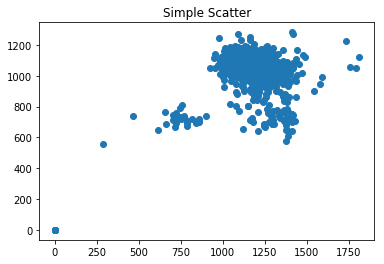

In [ ]:
"""
读取黄斑中央凹坐标信息并画出散点图
"""
import pandas as pd
import matplotlib.pyplot as plt

fovea_location_df = pd.read_excel("data/常规赛：PALM眼底彩照中黄斑中央凹定位/Train/Fovea_Location_train.xlsx")
print(type(fovea_location_df), fovea_location_df.shape)
fovea_location_np = fovea_location_df.values
print(type(fovea_location_np), fovea_location_np.shape)

fovea_location_np = fovea_location_np[:, 1:]
print(type(fovea_location_np), fovea_location_np.shape)

fig, ax = plt.subplots()
# print(fovea_location_np[0])
# ax.plot(fovea_location_np[0, 0], fovea_location_np[0, 1], 'o')
ax.plot(fovea_location_np[:, 0], fovea_location_np[:, 1], 'o')
ax.set_title('Simple Scatter')
plt.show()


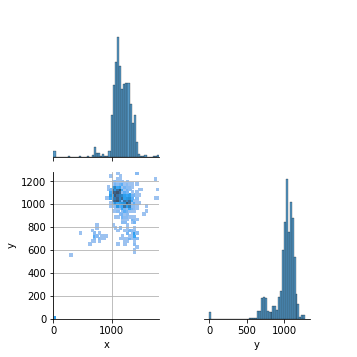

In [ ]:
"""
yolov5-master\\utils\\plots.py plot_labels line293
"""
import numpy as np
import pandas as pd
import seaborn as sn

# x = np.append(fovea_location_np, image_size_np, axis=1)
# print(type(x), x.shape)
# x = pd.DataFrame(x, columns=['x', 'y', 'width', 'height'])
# print(type(x), x.shape)
# print(x.head())
# print(x.info())

x = pd.DataFrame(fovea_location_np, columns=['x', 'y'])
sn.pairplot(x, corner=True, diag_kind='auto', kind='hist', diag_kws=dict(bins=50), plot_kws=dict(pmax=0.9))


### 黄斑中央凹可见


In [ ]:
# loc 根据 index 来索引，iloc 根据行号来索引
item = fovea_location_df.iloc[0, :]
print(item)
print(item['imgName'])


imgName    H0001.jpg
Fovea_X       743.96
Fovea_Y       790.54
Name: 0, dtype: object
H0001.jpg


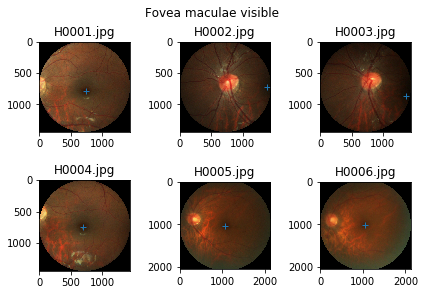

In [ ]:
from work.utils import plot_image_with_label

train_img_dir = "data/常规赛：PALM眼底彩照中黄斑中央凹定位/Train/fundus_image/"
train_label_csv = "data/常规赛：PALM眼底彩照中黄斑中央凹定位/Train/Fovea_Location_train.xlsx"

plot_image_with_label(train_img_dir, train_label_csv)


### 黄斑中央凹不可见

    用 excel 表筛选出金标准为(0.0, 0.0)的图片，画出这些图片。

![](note_images/黄斑中央凹不可见.png)


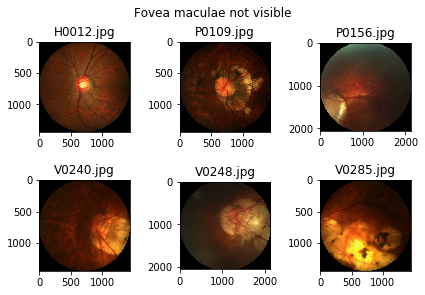

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

train_img_dir = "data/常规赛：PALM眼底彩照中黄斑中央凹定位/Train/fundus_image/"
invisible_imgs = ['H0012.jpg', 'P0109.jpg', 'P0156.jpg', 'V0240.jpg', 'V0248.jpg', 'V0285.jpg']
for i, img_name in enumerate(invisible_imgs):
    img = Image.open(train_img_dir + img_name)
    plt.subplot(2, 3, i+1)
    plt.title(img_name)
    plt.imshow(img)
plt.suptitle("Fovea maculae not visible", y=1.02)
plt.tight_layout()
plt.show()


## 评价指标

    平均欧式距离，计算每个测试样本预测的黄斑中央凹坐标与金标准的差距，最终计算平均的欧式距离。 最终评分为平均欧式距离的倒数。
    
    pre_point = (pre_x, pre_y)  # prediction
    gold_point = (gold_x, gold_y)  # gold standard
    eu_dist = sqrt((pre_x-gold_x)^2 + (pre_y-gold_y)^2)  # euclidean distance
    score = 1 / eu_dist


In [ ]:
import math

import paddle
from paddle.metric import Metric


class NME(Metric):
    def __init__(self, name='nme', *args, **kwargs):
        super(NME, self).__init__(*args, **kwargs)
        self._name = name
        self.rmse = 0
        self.sample_num = 0
        self.rmses = 0

    def name(self):
        return self._name

    def update(self, preds, labels):
        N = preds.shape[0]

        self.rmse = 0
        for i in range(N):
            dist = math.pow((preds[i, 0] - labels[i, 0]), 2) + math.pow((preds[i, 1] - labels[i, 1]), 2)
            dist = math.sqrt(dist)
            self.rmse += dist
            self.rmses += dist
            self.sample_num += 1

        return self.rmse / N

    def accumulate(self):
        return self.rmses / self.sample_num

    def reset(self):
        self.rmse = 0
        self.sample_num = 0
        self.rmses = 0


## 提交内容及格式

    黄斑中央凹定位比赛的提交内容需将所有测试图像的黄斑坐标存入一个CSV文件，名为“Fovea_Localization_Results.csv”，第一列对应测试眼底图像的文件名(包括扩展名“.jpg”)，第二列包含x坐标，第三列包含y坐标。 请确保提交预测结果的存储顺序为T0001.jpg~T0400.jpg。

## 比赛链接

[常规赛：PALM眼底彩照中黄斑中央凹定位](https://aistudio.baidu.com/aistudio/competition/detail/86)


# Data Augment

    虽然本赛题是一个预测点位置的回归问题，但是问题中隐含了一个分类（中央凹是否可见）。
    
    在训练集中，中央凹不可见的图片只有 6 张，样本极度地不平衡。所以我们要想办法增加中央凹不可见图片的数量。


## 十字切割

    我把图像十字切割，分成大小相同的四张图片。中央凹点落在哪张图片上，就把它相应修改设置为该图像的 label，其他 3 张图片的 label 为(0.0, 0.0)。
    
    cross_crop
    input:
        图像目录，标签文件
    output:
        新的图像目录，新的标签文件
        新的图像目录和新的标签文件中应包含原图像和原标签
    
    实验证明，这种数据增强方法并没有取得很好的结果。


722 722
743.96 790.54


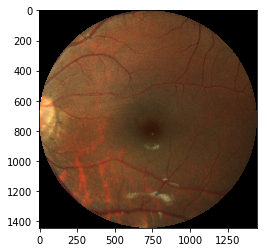

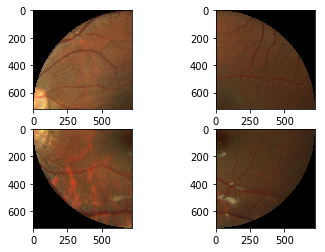

[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [21.960000000000036, 68.53999999999996]]


In [ ]:
# crops one image
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

train_img_dir = "data/常规赛：PALM眼底彩照中黄斑中央凹定位/Train/fundus_image/"

fovea_location_df = pd.read_excel("data/常规赛：PALM眼底彩照中黄斑中央凹定位/Train/Fovea_Location_train.xlsx")
item = fovea_location_df.iloc[0, :]
img_name = item['imgName']
Fovea_X = item['Fovea_X']
Fovea_Y = item['Fovea_Y']
img = Image.open(train_img_dir + img_name)

width, height = img.size
new_width, new_height = width // 2, height // 2

new_location1 = (0, 0, new_width, new_height)
new_location2 = (new_width, 0, width, new_height)
new_location3 = (0, new_height, new_width, height)
new_location4 = (new_width, new_height, width, height)

img1 = img.crop(new_location1)
img2 = img.crop(new_location2)
img3 = img.crop(new_location3)
img4 = img.crop(new_location4)

print(new_width, new_height)
print(Fovea_X, Fovea_Y)

plt.imshow(img)
plt.show()
plt.subplot(2, 2, 1)
plt.imshow(img1)
plt.subplot(2, 2, 2)
plt.imshow(img2)
plt.subplot(2, 2, 3)
plt.imshow(img3)
plt.subplot(2, 2, 4)
plt.imshow(img4)
plt.show()

def adjust_one_coordinate(src_coordinate, img_location):
    if img_location[0]<src_coordinate[0]<img_location[2] and img_location[1]<src_coordinate[1]<img_location[3]:
        return [src_coordinate[0]-img_location[0], src_coordinate[1]-img_location[1]]
    else:
        return [0.0, 0.0]

new_coordinate = []
src_coordinate = (Fovea_X, Fovea_Y)
new_coordinate.append(adjust_one_coordinate(src_coordinate, new_location1))
new_coordinate.append(adjust_one_coordinate(src_coordinate, new_location2))
new_coordinate.append(adjust_one_coordinate(src_coordinate, new_location3))
new_coordinate.append(adjust_one_coordinate(src_coordinate, new_location4))
print(new_coordinate)


In [ ]:
from work.data_augment import cross_crop

train_img_dir = r"data/常规赛：PALM眼底彩照中黄斑中央凹定位/Train/fundus_image/"
train_label_excel = r"data/常规赛：PALM眼底彩照中黄斑中央凹定位/Train/Fovea_Location_train.xlsx"
new_img_dir = r"data/常规赛：PALM眼底彩照中黄斑中央凹定位/NewTrain/fundus_image/"
new_label_excel = r"data/常规赛：PALM眼底彩照中黄斑中央凹定位/NewTrain/Fovea_Location_train.xlsx"
cross_crop(train_img_dir, train_label_excel, new_img_dir, new_label_excel)


100%|██████████| 800/800 [03:32<00:00,  3.76it/s]


# 解题过程

## 基准方法

* 建立一种基于常识的、非深度学习的基准方法，它可以作为合理性检查，还可以建立一个基准，更高级的深度学习模型需要打败这个基准才能表现出其有效性。

In [ ]:
"""
把训练集中所有黄斑中央凹在图像中的坐标值的均值作为所有测试图片的预测值

Score:0.00668	ED:149.72299
"""
import os
import numpy as np
import pandas as pd

fovea_location_df = pd.read_excel("data/常规赛：PALM眼底彩照中黄斑中央凹定位/Train/Fovea_Location_train.xlsx")
fovea_location_np = fovea_location_df.values[:, 1:]
fovea_location_mean = np.mean(fovea_location_np, axis=0)
print(fovea_location_mean)

pre_data = []
for (dirpath, dirnames, filenames) in os.walk("data/常规赛：PALM眼底彩照中黄斑中央凹定位/PALM-Testing400-Images"):
    for img_name in filenames:
        pre_data.append([img_name, fovea_location_mean[0], fovea_location_mean[1]])

submission_df = pd.DataFrame(pre_data, columns=['imgName', 'Fovea_X', 'Fovea_Y'])
submission_df.sort_values(by="imgName", inplace=True, ascending=True)
submission_df.to_csv("submission/base_submission.csv", index=None)


[1160.2751125 1010.9396249999992]


In [ ]:
# 可以看到这两个 DataFrame 的 imgNmae 顺序不一致
print(train_image_size_df.head())
print("========================================")
print(fovea_location_df.head())


     imgName  Width  Height
0  V0285.jpg   1444    1444
1  P0091.jpg   1444    1444
2  V0241.jpg   2124    2056
3  V0352.jpg   1444    1444
4  V0215.jpg   2124    2056
     imgName  Fovea_X  Fovea_Y
0  H0001.jpg   743.96   790.54
1  H0002.jpg  1394.82   725.54
2  H0003.jpg  1361.74   870.72
3  H0004.jpg   703.15   742.44
4  H0005.jpg  1070.95  1037.54


In [ ]:
"""
基本思路跟上个 cell 一样，只是考虑到图片的大小

Score:0.00601	ED:166.26517
"""
import os
import numpy as np
import pandas as pd
from PIL import Image

from work.utils import get_sizes

train_img_dir = "data/常规赛：PALM眼底彩照中黄斑中央凹定位/Train/fundus_image"

train_size_list = get_sizes(train_img_dir)
train_image_size_df = pd.DataFrame(train_size_list, columns=['imgName', 'Width', 'Height'])

fovea_location_df = pd.read_excel("data/常规赛：PALM眼底彩照中黄斑中央凹定位/Train/Fovea_Location_train.xlsx")

df_merge = pd.merge(fovea_location_df, train_image_size_df, on='imgName')
df_merge.sort_values(by="imgName", inplace=True, ascending=True)

df_merge['x'] = df_merge['Fovea_X'] / df_merge['Width']
df_merge['y'] = df_merge['Fovea_Y'] / df_merge['Height']

# print(type(df_merge), df_merge[0: 5])

fovea_location_np = df_merge.values[:, 5:]
fovea_location_mean = np.mean(fovea_location_np, axis=0)
print(fovea_location_mean)

pre_data = []
for (dirpath, dirnames, filenames) in os.walk("data/常规赛：PALM眼底彩照中黄斑中央凹定位/PALM-Testing400-Images"):
    for img_name in filenames:
        img_absolute_path = dirpath + "/" + img_name
        image = Image.open(img_absolute_path)
        width, height = image.size
        pre_data.append([img_name, fovea_location_mean[0] * width, fovea_location_mean[1] * height])

submission_df = pd.DataFrame(pre_data, columns=['imgName', 'Fovea_X', 'Fovea_Y'])
submission_df.sort_values(by="imgName", inplace=True, ascending=True)
submission_df.to_csv("submission/base_submission2.csv", index=None)


[0.5788825348966568 0.5116117035337415]


## 载入数据集

In [ ]:
import cv2
import numpy as np

filepath = "data/常规赛：PALM眼底彩照中黄斑中央凹定位/Train/fundus_image/H0001.jpg"
img = cv2.imread(filepath)
# 读入的图像数据格式是[H, W, C]
print(img.shape)
# 使用转置操作将其变成[C, H, W]
img = np.transpose(img, (2,0,1))
print(img.shape)


(1444, 1444, 3)
(3, 1444, 1444)


In [ ]:
"""
使用 paddle API 写的 DataSet
"""
import pandas as pd
import paddle

from work.dataset import TrainDataset, TestDataset

data_dir = 'data/常规赛：PALM眼底彩照中黄斑中央凹定位/Train/fundus_image'
total_data_info = pd.read_excel('dataset/常规赛：PALM眼底彩照中黄斑中央凹定位/Train/Fovea_Location_train.xlsx')
total_data_list = total_data_info.values.tolist()

test_dir = "data/常规赛：PALM眼底彩照中黄斑中央凹定位/PALM-Testing400-Images"

print('============= train dataset =============')
train_dataset = TrainDataset(data_dir, total_data_list, image_size=(448, 448))
for data, label in train_dataset:
    print(data.shape, label.shape)
    break
train_loader = paddle.io.DataLoader(train_dataset, return_list=True, shuffle=True, batch_size=50)
for data, label in train_loader:
    print(data.shape, label.shape)
    break

print('============= test dataset =============')
test_dataset = TestDataset(test_dir, image_size=(448, 448))
for data in test_dataset:
    print(data.shape)
    break
test_loader = paddle.io.DataLoader(test_dataset, return_list=True, batch_size=50)
for data in test_loader:
    print(data.shape)
    break


============= train dataset =============
(3, 448, 448) (2,)
[50, 3, 448, 448] [50, 2]
============= test dataset =============
(3, 448, 448)
[50, 3, 448, 448]


## 建立模型

In [2]:
import random
import warnings

import paddle
from paddle.optimizer import Momentum
from paddle.nn import SmoothL1Loss
from paddle.vision.transforms import Transpose

import pandas as pd
from work.dataset import TrainDataset
from work.models import NME, MyNet

warnings.filterwarnings('ignore')  # 忽略 warning

use_gpu = True
paddle.set_device('gpu') if use_gpu else paddle.set_device('cpu')

IMAGE_SIZE = (560, 560)
BATCH_SIZE = 32
MODEL_NAME = 'resnet101'

train_data_dir = 'data/常规赛：PALM眼底彩照中黄斑中央凹定位/NewTrain/fundus_image'
train_data_info = pd.read_excel('data/常规赛：PALM眼底彩照中黄斑中央凹定位/NewTrain/Fovea_Location_train.xlsx')
train_data_list = train_data_info.values.tolist()

val_data_dir = 'data/常规赛：PALM眼底彩照中黄斑中央凹定位/Train/fundus_image'
val_data_info = pd.read_excel('data/常规赛：PALM眼底彩照中黄斑中央凹定位/Train/Fovea_Location_train.xlsx')
val_data_list = val_data_info.values.tolist()

train_dataset = TrainDataset(train_data_dir, train_data_list, image_size=IMAGE_SIZE, mode='train')
val_dataset = TrainDataset(val_data_dir, val_data_list, image_size=IMAGE_SIZE, mode='val')

train_loader = paddle.io.DataLoader(train_dataset, return_list=True, shuffle=True, batch_size=BATCH_SIZE)
val_loader = paddle.io.DataLoader(val_dataset, return_list=True, shuffle=False, batch_size=BATCH_SIZE)

print('============= custom dataloader =============')
for data, label in train_loader:
    print("train shape:", data.shape, label.shape)
    break
for data, label in val_loader:
    print("val shape:", data.shape, label.shape)
    break

model = paddle.Model(MyNet(key_pts=1))

# 定义优化器
optimizer = paddle.optimizer.Adam(learning_rate=1e-3, weight_decay=5e-4, parameters=model.parameters())
# 进行训练前准备
model.prepare(optimizer, SmoothL1Loss(reduction='mean', delta=0.1), NME())

callbacks = [paddle.callbacks.VisualDL(log_dir='log/visualdl_log_dir/{}_output'.format(MODEL_NAME)),
    paddle.callbacks.ModelCheckpoint(save_dir="./log/checkpoints/{}".format(MODEL_NAME)),
    paddle.callbacks.ProgBarLogger(log_freq=10, verbose=2)]

print('============= start fit =============')
# 启动训练
model.fit(train_loader,
          val_loader,
          epochs=50,
        #   save_dir="./log/checkpoints/{}".format(MODEL_NAME),
          callbacks=callbacks)


============= custom dataloader =============
train shape: [32, 3, 560, 560] [32, 2]
val shape: [32, 3, 560, 560] [32, 2]
============= start fit =============
The loss value printed in the log is the current step, and the metric is the average value of previous steps.
Epoch 1/50
step  10/125 - loss: 0.0058 - nme: 0.2813 - 1s/step


## 预测结果

In [ ]:
import paddle

from work.dataset import TestDataset
from work.models import MyNet

test_dir = "data/常规赛：PALM眼底彩照中黄斑中央凹定位/PALM-Testing400-Images"

test_dataset = TestDataset(test_dir, image_size=(1120, 1120))
test_loader = paddle.io.DataLoader(test_dataset, return_list=True, batch_size=1)

model = paddle.Model(MyNet(key_pts=1, mode='test'))
model.load('log/checkpoints/resnet50/39.pdparams')

result = model.predict(test_loader)



import numpy as np
from paddle.io import DataLoader, Dataset

class RandomDataset(Dataset):
    def __getitem__(self, idx):
        data = np.random.random((2, 3)).astype('float32')

        return data

    def __len__(self):
        return 10

dataset = RandomDataset()
loader = DataLoader(dataset, batch_size=1)
data = next(loader())

In Paddle <= 2.0, data is in format '[Tensor(shape=(1, 2, 3), dtype=float32)]', and in Paddle >= 2.1, data is in format 'Tensor(shape=(1, 2, 3), dtype=float32)'



Predict begin...
step  64/400 [===>..........................] - ETA: 37s - 112ms/st
step 400/400 [==============================] - 108ms/step        
Predict samples: 400


In [ ]:
import os
import numpy as np

test_dir = "data/常规赛：PALM眼底彩照中黄斑中央凹定位/PALM-Testing400-Images"

print(type(result))
result_np = np.array(result)
print(result_np.shape)
result_np = result_np.reshape((-1, 2))
print(result_np.shape)
# result_sub = np.argmax(result_np, axis=1)
# print(type(result_sub), result_sub.shape)
test_img_names = np.array(os.listdir(test_dir))
test_img_names = np.expand_dims(test_img_names, 1)
print(type(test_img_names), test_img_names.shape)
submission_np = np.concatenate((test_img_names, result_np), axis=1)
print(type(submission_np), submission_np.shape)
print(type(submission_np[0, 1]))


<class 'list'>
(1, 400, 1, 2)
(400, 2)
<class 'numpy.ndarray'> (400, 1)
<class 'numpy.ndarray'> (400, 3)
<class 'numpy.str_'>


In [ ]:
from PIL import Image

for i, img_name in enumerate(test_img_names[:, 0]):
    img_absolute_path = test_dir + "/" + img_name
    image = Image.open(img_absolute_path)
    width, height = image.size
    submission_np[i, 1] = float(submission_np[i, 1]) * width
    submission_np[i, 2] = float(submission_np[i, 2]) * height

print(submission_np[0])


['T0398.jpg' '1205.86525308' '1026.02681568']


In [ ]:
import pandas as pd

Submit_data = pd.DataFrame(submission_np)          # 转为DataFrame格式
Submit_data.columns = ['FileName', 'Fovea_X', 'Fovea_Y']    # 修改列名
Submit_data = Submit_data.sort_values(by='FileName').reset_index(drop=True)   # 按照图片id排列
Submit_data.to_csv('submission/Fovea_Localization_Results.csv', index=False, float_format="%.2f")       # 保存结果csv


In [ ]:
# 将上述预测结果的代码合并至 predict_back.py
! python work/predict_back.py


In [ ]:
# 将预测结果的代码编写为友好的命令行接口
! python work/predict.py --weights log/checkpoints/resnet101/30.pdparams --imgsz 1120 --submission submission/Fovea_Localization_Results_resnet101.csv


## 观察预测结果


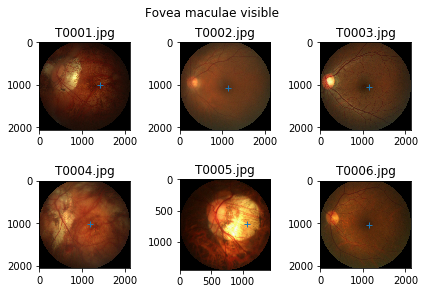

In [ ]:
from work.utils import plot_image_with_label

test_img_dir = "data/常规赛：PALM眼底彩照中黄斑中央凹定位/PALM-Testing400-Images/"
label_csv = "submission/Fovea_Localization_Results_resnet50.csv"

plot_image_with_label(test_img_dir, label_csv)


## 较优结果的记录

    resnet50 34 0.0074 该结果来自于： 权重参数 log/checkpoints/resnet50/34.pdparams 结果文件 submission/Fovea_Localization_Results_resnet50.csv


# 要说的话

    说实话，目前我在这个比赛上做的工作还很简单，目前的效果略优于我设置的基准（金标准的均值），还有很多需要改进的地方。由于工作较忙还有自身的懒惰，很多代码还没完善，很多想法还没实现。想要做的事写在下方的 TODO 里。

## TODO
    
    数据增强，之前做的十字切割效果很不好，重新设计一种自己的随机切割。（为什么不用 paddle API 自带的数据增强？因为一旦图片有像素点位置的变化，金标准的点的位置也要相应做出改变。）
    
    将训练代码改成命令行的形式。
    
    编写测试程序，测试模型在训练集上的得分。
    
    修改模型的输出值，增加一个神经元用以预测黄斑中央凹是否可见。编写激活函数，对于不可见的图像，坐标值激活为(0.0, 0.0)。编写损失函数，以对应我这种设计。（想要用中央凹是否可见以指导中央凹点的预测位置）
    
    金标准的中央凹点密度图已经编写在数据集介绍这一节中，将其函数化，替代原来的写法并复用——画出中央凹点预测值的密度图。
    
    借鉴目标检测模型，把关键点检测改为先进行目标检测，检测出含有中央凹的小框，再对这个小框进行关键点检测。（人脸识别就是这么做的，先进行人脸检测，再进行关键点检测，通过这些关键点摆正人脸，再对摆正的人脸进行特征提取，然后进行特征比对）
    
    阅读比赛参考资料中的论文。

## 自我介绍

    我目前就职于浪潮软件集团有限公司研发部，研究方向是目标检测。如有兴趣加入我们（无论是 paddle 项目、比赛或者是浪潮）或者对我的项目有什么建议，联系方式为 wuwenqi@inspur.com。
    
    我在AI Studio上获得白银等级，点亮3个徽章，来互关呀~ https://aistudio.baidu.com/aistudio/personalcenter/thirdview/184363


请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 